**YOUR NAMES HERE**

Fall 2023

CS343: Neural Networks

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from PIL import Image

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 3 |  Convolutional Neural Networks

## Task 1: Single channel 2D Convolution (Grayscale image filtering)

As the name suggests, a critical component of a convolutional neural network is the **convolution** operation. We're going to start by implementing a function in `filter_ops.py` that convolves an image with a filter. You will make use of this function when you build the convolutional net next week. We'll make several versions of the function to help with the debugging, gradually adding complexity.

First, implement `conv2_gray` according to the specifications in the comments. Run the following code to test your implementation

### 1a. Single kernel synthetic data tests

In [2]:
from filter_ops import conv2_gray

#### Test: Single kernel, odd image size

In [3]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 7
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols, 1))

# Single uniform (normalized) averaging kernel
test_ker_sz = 2
test_ker = np.ones([1, test_ker_sz, test_ker_sz])
test_ker /= test_ker.sum()
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker}')

test img shape is (7, 7) and test ker shape is (1, 2, 2)
test img looks like:
[[1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]]
and test ker looks like
[[[0.25 0.25]
  [0.25 0.25]]]


In [4]:
test_out_img = conv2_gray(test_img, test_ker, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 7, 7)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker[0], mode='same'))
print('------------------------------------')

img_x=7, img_y=7
n_kers=1, ker_x=2, ker_y=2
Your filtered image shape is (1, 7, 7) and it should be (1, 7, 7)
Here is your filtered image:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]]
------------------------------------
Here is what it should look like:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]]
------------------------------------


#### Test: Single kernel, even image size

In [5]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 8
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols, 1))
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker}')

test img shape is (8, 8) and test ker shape is (1, 2, 2)
test img looks like:
[[1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]]
and test ker looks like
[[[0.25 0.25]
  [0.25 0.25]]]


In [6]:
test_out_img = conv2_gray(test_img, test_ker, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 8, 8)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker[0], mode='same'))
print('------------------------------------')

img_x=8, img_y=8
n_kers=1, ker_x=2, ker_y=2
Your filtered image shape is (1, 8, 8) and it should be (1, 8, 8)
Here is your filtered image:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]]
------------------------------------
Here is what it should look like:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]]
--------------------------

#### Test: Single kernel (odd shape), even image size

In [7]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 8
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols+2, 1))

test_ker2_sz = 5
test_ker2 = np.ones([1, test_ker2_sz, test_ker2_sz])
test_ker2 /= test_ker2.sum()
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker2.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker2}')

test img shape is (10, 8) and test ker shape is (1, 5, 5)
test img looks like:
[[1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]]
and test ker looks like
[[[0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]]]


In [8]:
test_out_img = conv2_gray(test_img, test_ker2, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 10, 8)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker2[0], mode='same'))
print('------------------------------------')

img_x=10, img_y=8
n_kers=1, ker_x=5, ker_y=5
Your filtered image shape is (1, 10, 8) and it should be (1, 10, 8)
Here is your filtered image:
------------------------------------
[[0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]
 [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
 [0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]]
------------------------------------
Here is what it should look like:
------------------------------------
[[0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]
 [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.

### 1b. Multiple kernel grayscale image tests

Now you're ready to test your convolution function on an actual image!

#### 1b (i). Load in clownfish image

Download the image of the clown fish from the project website (`clownfish.png`). Put it in a folder called `images/` in your project working directory then run the following code to import it.

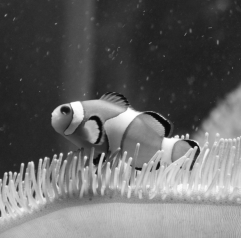

In [9]:
# Load in the clownfish image then convert to grayscale for testing
clownfish = Image.open('images/clownfish.png', 'r')
clownfish_gray = clownfish.convert('L')  # convert to grayscale
clownfish_gray

#### 1b (ii). Generate and plot Gabor filters

Run the following code to define and plot Gabor filters. You will uses these filters to test out your convolution.

Gabor filters are a broad class of kernels, and the following function generates those that approximate the receptive field of certain neurons (**simple cells**) in an area of the brain called primary visual cortex (V1). The equation comes from an analysis of the neurophysiological data by Lee (1996): 

http://leelab.cnbc.cmu.edu/publication/assets/links/ImageRepre.pdf

In [10]:
def gabor(filter_sz_xy, w, theta, K=np.pi):
    ''' Generates a simple cell-like Gabor filter.
    
    Parameters:
    -----------
    filter_sz_xy: tuple. shape=(filter width, filter height)
    w: float. spatial frequency of the filter
    theta: float. Angular direction of the filter in radians
    K: float. Angular phase of the filter in radians
    '''
    rad_x, rad_y = filter_sz_xy
    rad_x, rad_y = int(rad_x/2), int(rad_y/2)
    [x, y] = np.meshgrid(np.arange(-rad_x, rad_x+1), np.arange(-rad_y, rad_y+1))

    x_p = x*np.cos(theta) + y*np.sin(theta)
    y_p = -x*np.sin(theta) + y*np.cos(theta)
    
    # Take the real part of the filter
    gauss = w**2 / (4*np.pi*K**2) * np.exp(-(w**2/(8*K**2)) * (4*x_p**2 + y_p**2))
    sinusoid = np.cos(w*x_p) * np.exp(K**2/2)
    gabor = gauss * sinusoid
    return gabor


def plot_image_panel(imgs):
    fig, axes = plt.subplots(ncols=len(imgs), figsize=(3*len(imgs),6))
    if len(imgs) == 1:
        axes.imshow(imgs[0])
        axes.set_xticks([])
        axes.set_yticks([])
    else:
        for ax, img in zip(axes, imgs):
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

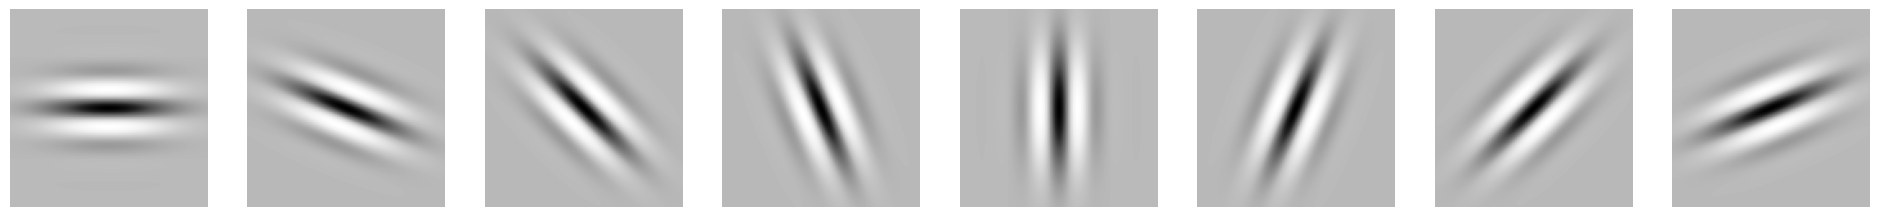

In [11]:
gabor_kers = []
for th in np.arange(-np.pi/2, np.pi/2, np.pi/8):
    gabor_kers.append(gabor(filter_sz_xy=[121, 121], w=0.25, theta=th))
plot_image_panel(gabor_kers)

#### 1b (iii). Create Gabor filters for convolution

These filters look nice, but their 121x121 size adds needless computation time (especially just to test your convolution function!).

Write code below that generates 4 (total) Gabor filters that respond to
- horizontal
- `-45`° (negative slope)
- vertical
- `45`° (positive slope)

bar orientations with spatial frequency `2` and filter size `(21, 21)`. Convert the list to a numpy array (`shape = (4, 21, 21)`).

Note: the `gabor` function assumes the angles are in **radians**, not degrees

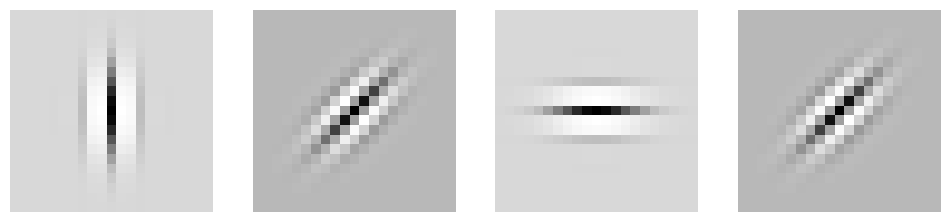

Test kernels have shape (4, 21, 21) and it should be (4, 21, 21)
Assuming that you generated the filters in the above order, the center few values in each of your filters are:
[[ 4.263  4.484  4.263]
 [ 0.616  4.484  0.616]
 [-1.524  4.484 -1.524]
 [ 0.616  4.484  0.616]]
and they should be:
[[-1.524  4.484 -1.524]
 [ 0.616  4.484  0.616]
 [ 4.263  4.484  4.263]
 [ 0.616  4.484  0.616]]


In [12]:
# TODO: Set up test filters
gabor_kers = []

gabor_kers.append(gabor(filter_sz_xy=[21, 21], w=2, theta=2*np.pi))
gabor_kers.append(gabor(filter_sz_xy=[21, 21], w=2, theta=-7*np.pi/4))
gabor_kers.append(gabor(filter_sz_xy=[21, 21], w=2, theta=np.pi/2))
gabor_kers.append(gabor(filter_sz_xy=[21, 21], w=2, theta=np.pi/4))


plot_image_panel(gabor_kers)
gabor_kers = np.array(gabor_kers)
print(f'Test kernels have shape {gabor_kers.shape} and it should be (4, 21, 21)')
print('Assuming that you generated the filters in the above order, the center few values in each of your filters are:')
print(gabor_kers[:,9:12, 10])
print('and they should be:')
print('''[[-1.524  4.484 -1.524]
 [ 0.616  4.484  0.616]
 [ 4.263  4.484  4.263]
 [ 0.616  4.484  0.616]]''')

#### 1b (iv). Questions

The following code should produce four images that look like the clown fish but on a gray background.

**Question 1:** What is each filter picking up in the image?

**Answer 1:** 

img_x=238, img_y=241
n_kers=4, ker_x=21, ker_y=21
Your filtered clown fish shape is (4, 238, 241) and it should be (4, 238, 241)


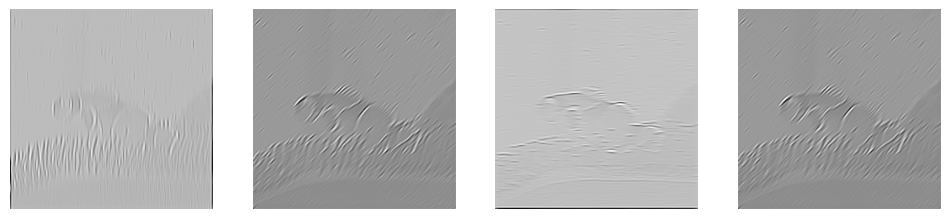

In [13]:
clownfish_gray_np = np.array(clownfish_gray)
clownfish_gray_out = conv2_gray(clownfish_gray_np, gabor_kers)
print(f'Your filtered clown fish shape is {clownfish_gray_out.shape} and it should be (4, 238, 241)')
plot_image_panel(clownfish_gray_out)

## Task 2: Multi-channel 2D Convolution (RGB color image filtering)

Once you have your grayscale convolution working, copy-and-paste your code into the more general function `conv2`.

The difference with this new function is that the `img` input has a leading dimension for color channel. For example, `(3, 200, 200)` for a color image and `(1, 200, 200)` for grayscale. 

It shouldn't take a great deal of work to modify your `conv2_gray` code for this new case. See the function docstring for some hints.

In [14]:
from filter_ops import conv2

### 2a. Preprocess color clownfish image

In the cell below, take the color clownfish image and convert it to a numpy array called `clownfish_np` (*this is the variable name is assumed by test code*). Drop the 4th color channel (alpha channel) so that ony RGB channels remain. Also, restructure the dimensions so that the color channel is first (*see below test code*). Before transposing the image dimensions, `plt.imshow` should give you an output that looks like this:

<img src="images/clownfish.png" width="200">

Raw color clown fish image is (3, 238, 241) and should be (3, 238, 241)


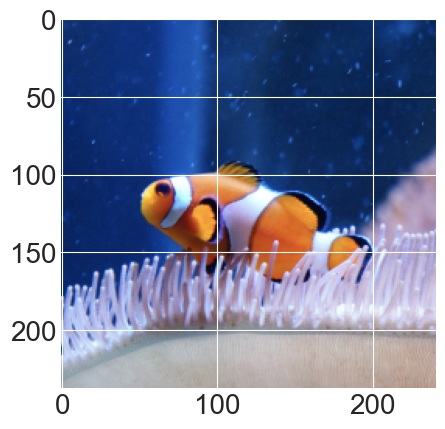

In [34]:
clownfish = Image.open('images/clownfish.png', 'r')
clownfish = clownfish.convert('RGB')
clownfish_np = np.array(clownfish)
plt.imshow(clownfish_np)
clownfish_np = np.reshape(clownfish, (3, 238, 241))
print(f'Raw color clown fish image is {clownfish_np.shape} and should be (3, 238, 241)')

### 2b. Box filter test

Make a 11x11 box filter, with constant, identical positive values normalized so that the entire filter sums to 1.

Add a leading singleton dimension so shape is `(1, 11, 11)`

In [41]:
# filter with box kernels
ones = np.ones((1,11,11))
box_ker = ones*(1/121)

print(f'Test kernels shape is {box_ker.shape} and should be (1, 11, 11)')
print(f'box ker looks like\n{box_ker}')

Test kernels shape is (1, 11, 11) and should be (1, 11, 11)
box ker looks like
[[[0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]]]


In [57]:
clownfish_out = conv2(clownfish_np, box_ker)
print(f'Your filtered clown fish shape is {clownfish_out.shape} and it should be (1, 3, 238, 241)')

img_x=238, img_y=241
n_kers=1, ker_x=11, ker_y=11
[19.686 19.645 34.099]
[22.587 22.744 39.298]
[26.43  26.579 44.636]
[29.446 29.529 51.405]
[32.38  32.653 57.083]
[36.231 36.496 63.446]
[36.331 36.364 66.149]
[35.413 35.645 66.57 ]
[36.273 36.529 67.083]
[36.463 36.364 69.529]
[35.719 35.603 70.843]
[36.661 36.413 71.207]
[36.835 36.198 72.587]
[36.14  35.355 73.066]
[37.083 36.124 72.628]
[37.198 35.868 72.289]
[36.512 35.    70.893]
[37.471 35.744 69.182]
[37.554 35.529 68.595]
[36.785 34.587 66.314]
[37.645 35.24  63.661]
[37.636 35.025 63.256]
[36.818 34.198 61.19 ]
[37.645 34.934 60.19 ]
[37.62 34.76 60.76]
[36.744 33.86  59.884]
[37.496 34.421 60.917]
[37.388 34.124 61.537]
[36.355 33.149 59.669]
[36.934 33.62  60.843]
[36.785 33.397 61.645]
[35.686 32.421 60.157]
[36.14  32.752 61.157]
[35.975 32.504 60.19 ]
[34.901 31.455 55.909]
[35.215 31.645 54.256]
[35.058 31.488 52.463]
[34.017 30.471 47.107]
[34.223 30.554 45.901]
[34.074 30.455 45.81 ]
[33.033 29.463 39.917]
[33.091 29

[ 61.983  55.471 156.421]
[ 63.116  55.264 157.736]
[ 62.686  54.926 156.95 ]
[ 62.19   55.215 154.446]
[ 63.207  55.14  156.727]
[ 62.868  54.835 156.95 ]
[ 62.281  55.107 155.62 ]
[ 63.273  55.116 159.38 ]
[ 62.983  54.868 160.95 ]
[ 62.438  55.099 159.636]
[ 63.521  55.314 163.289]
[ 63.413  55.182 165.702]
[ 63.058  55.421 163.388]
[ 64.289  55.62  166.587]
[ 64.413  55.372 168.298]
[ 64.132  55.488 163.959]
[ 65.43   55.504 167.488]
[ 65.826  55.149 169.868]
[ 65.86   55.132 166.653]
[ 67.223  55.157 170.355]
[ 67.76   54.884 172.231]
[ 67.694  54.868 168.124]
[ 69.033  54.86  170.562]
[ 69.711  54.645 170.314]
[ 69.702  54.702 164.388]
[ 71.025  54.843 167.537]
[ 71.669  54.694 169.769]
[ 71.504  54.901 163.694]
[ 72.43   55.397 165.669]
[ 72.38   55.372 164.645]
[ 71.645  55.496 156.339]
[ 72.306  56.149 156.909]
[ 71.983  56.041 155.041]
[ 70.785  56.322 147.066]
[ 71.264  57.306 148.636]
[ 70.579  57.116 148.76 ]
[ 69.124  57.364 141.736]
[ 69.694  58.231 144.182]
[ 68.975  58

[ 59.603  75.512 131.149]
[ 59.975  76.248 132.298]
[ 53.884  68.355 118.843]
[ 48.471  63.008 108.851]
[43.529 57.025 97.281]
[37.488 48.901 86.14 ]
[32.124 43.24  76.273]
[35.124 38.215 71.702]
[40.488 43.851 82.835]
[47.05  51.562 93.942]
[ 53.289  57.099 106.579]
[ 58.702  62.653 117.876]
[ 65.19   70.331 129.901]
[ 66.058  70.289 129.719]
[ 65.157  67.917 128.488]
[ 65.736  69.785 128.636]
[ 66.455  69.727 127.066]
[ 65.463  67.397 125.653]
[ 65.851  69.355 124.793]
[ 66.397  69.281 123.025]
[ 65.289  66.917 121.595]
[ 65.512  68.843 119.669]
[ 66.157  68.76  118.702]
[ 65.331  66.24  115.884]
[ 65.893  67.926 113.62 ]
[ 66.884  67.719 113.678]
[ 66.223  65.025 109.967]
[ 67.008  66.413 110.405]
[ 67.901  66.124 113.215]
[ 67.066  63.405 112.62 ]
[ 67.587  64.587 116.339]
[ 68.091  64.322 120.157]
[ 67.083  61.57  122.248]
[ 67.223  62.512 126.033]
[ 67.314  62.331 130.554]
[ 65.992  59.702 134.157]
[ 65.653  60.579 137.785]
[ 65.562  60.438 142.686]
[ 64.116  57.835 146.14 ]
[ 63

[ 64.967  61.926 142.777]
[ 63.934  59.124 143.917]
[ 63.992  59.818 146.388]
[ 64.107  59.744 150.322]
[ 63.083  57.099 152.686]
[ 63.107  57.744 154.736]
[ 63.322  57.711 157.248]
[ 62.331  55.198 156.372]
[ 62.231  55.545 156.355]
[ 62.438  55.769 157.083]
[ 61.388  53.421 154.165]
[ 61.083  53.554 152.504]
[ 61.207  53.959 152.182]
[ 60.124  51.86  147.669]
[ 59.612  51.86  144.025]
[ 59.719  52.364 142.512]
[ 58.835  50.471 137.496]
[ 58.174  50.397 133.719]
[ 58.413  50.975 132.669]
[ 57.587  49.463 128.545]
[ 56.76   49.314 126.463]
[ 57.256  50.066 128.868]
[ 56.653  48.835 129.43 ]
[ 55.686  48.694 131.537]
[ 56.298  49.504 136.256]
[ 55.744  48.479 139.752]
[ 54.653  48.488 142.05 ]
[ 55.165  49.488 145.744]
[ 54.711  48.736 148.992]
[ 53.562  48.909 152.661]
[ 54.256  50.017 155.934]
[ 54.074  49.405 157.694]
[ 52.884  49.57  160.909]
[ 53.653  50.711 162.058]
[ 53.835  50.017 160.603]
[ 52.686  50.132 162.017]
[ 53.62   51.289 163.083]
[ 53.959  50.612 162.537]
[ 52.893  50

[ 53.512  52.711 137.769]
[ 53.686  52.008 142.983]
[ 53.496  52.694 151.719]
[ 53.537  53.083 158.942]
[ 53.785  52.438 163.769]
[ 53.678  53.157 171.132]
[ 53.76   53.727 175.86 ]
[ 54.091  53.207 175.182]
[ 53.909  54.165 173.95 ]
[ 53.983  54.909 170.645]
[ 54.281  54.322 165.19 ]
[ 54.083  55.314 160.364]
[ 54.165  55.901 154.86 ]
[ 54.521  55.215 151.86 ]
[ 54.372  56.025 150.091]
[ 54.521  56.331 147.273]
[ 54.818  55.554 146.43 ]
[ 54.686  56.05  147.529]
[ 54.793  56.025 148.917]
[ 55.05   55.066 153.273]
[ 55.017  55.322 157.752]
[ 55.157  55.289 158.537]
[ 55.355  54.24  160.975]
[ 55.289  54.587 163.769]
[ 55.43   54.645 161.711]
[ 55.653  53.793 161.215]
[ 55.636  54.421 162.95 ]
[ 55.818  54.529 160.736]
[ 55.992  53.86  158.636]
[ 56.033  54.76  158.893]
[ 56.339  54.95  156.149]
[ 56.488  54.38  154.488]
[ 56.504  55.38  158.083]
[ 56.826  55.661 160.364]
[ 57.05   55.149 162.975]
[ 57.116  56.207 169.165]
[ 57.496  56.653 172.421]
[ 57.686  56.562 175.289]
[ 57.835  58

[ 55.281  52.207 159.314]
[ 54.612  51.777 164.215]
[ 55.661  52.008 168.76 ]
[ 55.926  50.322 169.942]
[ 55.289  50.488 170.083]
[ 56.529  52.091 171.777]
[ 56.694  51.587 170.777]
[ 55.95   52.041 170.025]
[ 57.116  53.711 170.76 ]
[ 57.289  53.14  167.331]
[ 56.438  53.182 163.041]
[ 57.322  54.298 160.025]
[ 57.372  53.835 154.091]
[ 56.306  54.107 149.744]
[ 56.893  55.24  148.347]
[ 56.893  54.636 144.818]
[ 55.719  54.256 142.364]
[ 56.397  55.05  144.256]
[ 56.364  54.149 145.752]
[ 55.19   53.686 148.165]
[ 55.843  54.752 153.752]
[ 55.76   53.983 159.554]
[ 54.711  53.81  164.702]
[ 55.529  54.76  170.802]
[ 55.471  53.645 176.562]
[ 54.488  53.    179.686]
[ 55.388  54.025 184.033]
[ 55.446  53.339 186.612]
[ 54.479  52.736 185.413]
[ 55.331  54.298 183.942]
[ 55.38   54.463 181.975]
[ 54.413  53.843 179.686]
[ 55.314  55.744 176.579]
[ 55.479  56.256 173.298]
[ 54.603  55.893 171.818]
[ 55.62   57.835 170.62 ]
[ 55.917  58.364 169.661]
[ 55.     58.041 169.876]
[ 55.992  59

[ 55.686  58.207 183.826]
[ 55.074  59.835 185.132]
[ 55.306  59.826 185.033]
[ 54.372  59.174 185.008]
[ 54.132  60.934 186.818]
[ 54.595  60.818 186.802]
[ 53.868  60.017 187.719]
[ 54.264  61.843 189.901]
[ 55.339  61.554 189.736]
[ 55.496  60.702 189.992]
[ 56.008  62.901 190.355]
[ 56.851  62.818 187.074]
[ 56.355  62.289 184.405]
[ 56.769  64.818 183.248]
[ 57.347  65.074 179.777]
[ 56.669  64.686 176.785]
[ 57.058  67.57  175.421]
[ 57.331  68.074 173.248]
[ 56.339  67.678 170.884]
[ 56.306  70.744 169.81 ]
[ 55.777  71.314 169.446]
[ 55.     70.926 168.934]
[ 55.421  74.132 171.314]
[ 55.512  74.777 173.198]
[ 54.86   74.587 173.736]
[ 55.702  77.893 176.504]
[ 56.149  78.554 177.736]
[ 55.562  78.43  178.645]
[ 56.851  81.868 180.438]
[ 57.57   82.579 181.14 ]
[ 56.843  82.537 181.603]
[ 58.05   86.033 181.215]
[ 58.455  86.603 180.397]
[ 57.545  86.636 179.694]
[ 58.686  90.256 179.182]
[ 58.851  90.595 179.19 ]
[ 57.769  90.57  179.215]
[ 58.636  94.107 180.165]
[ 58.545  94

[ 55.876  64.901 167.008]
[ 56.917  66.711 173.595]
[ 55.983  70.264 179.545]
[ 56.24   64.264 183.314]
[ 57.306  66.289 189.388]
[ 56.339  70.157 193.008]
[ 56.479  64.207 193.38 ]
[ 57.496  66.322 194.207]
[ 56.479  70.231 193.008]
[ 56.636  64.041 190.521]
[ 57.669  65.934 189.083]
[ 56.769  69.793 186.579]
[ 56.884  63.636 183.851]
[ 57.942  65.455 182.777]
[ 56.992  69.421 180.736]
[ 56.983  63.471 179.198]
[ 57.917  65.653 180.099]
[ 57.033  69.967 179.612]
[ 57.041  64.116 179.661]
[ 58.083  66.421 181.587]
[ 57.322  70.876 182.099]
[ 57.446  65.099 182.917]
[ 58.545  67.215 185.562]
[ 57.81   71.529 187.372]
[ 58.041  65.727 188.843]
[ 59.231  67.38  191.636]
[ 58.471  71.273 191.248]
[ 58.744  65.331 189.603]
[ 59.959  66.008 189.537]
[ 59.05   69.157 186.488]
[ 59.091  63.041 183.388]
[ 60.157  63.421 183.207]
[ 59.132  66.405 181.562]
[ 58.992  60.554 179.38 ]
[ 59.917  60.802 179.388]
[ 58.802  63.826 177.364]
[ 58.653  58.413 175.405]
[ 59.669  58.496 178.207]
[ 58.57   61

[ 56.587  65.884 175.124]
[ 56.405  67.95  182.066]
[ 56.529  70.702 186.248]
[ 57.     63.81  188.562]
[ 56.727  66.19  193.165]
[ 56.678  69.182 194.38 ]
[ 57.     62.595 193.893]
[ 56.669  65.455 194.595]
[ 56.612  68.909 192.851]
[ 57.     62.785 190.355]
[ 56.653  65.81  189.43 ]
[ 56.694  69.231 186.215]
[ 57.116  63.149 182.727]
[ 56.793  65.884 182.099]
[ 56.826  69.149 179.314]
[ 57.207  62.694 177.562]
[ 56.917  65.116 178.81 ]
[ 56.967  68.083 177.347]
[ 57.322  61.273 176.62 ]
[ 57.008  63.603 178.545]
[ 57.008  66.587 178.636]
[ 57.306  60.149 179.347]
[ 57.058  62.851 182.653]
[ 56.992  66.099 185.405]
[ 57.372  60.149 187.537]
[ 57.149  63.132 191.727]
[ 57.174  66.405 192.901]
[ 57.661  60.628 192.959]
[ 57.43   63.57  194.595]
[ 57.322  66.744 192.628]
[ 57.719  60.777 190.397]
[ 57.512  63.463 190.521]
[ 57.397  66.397 188.661]
[ 57.736  60.314 186.595]
[ 57.554  62.612 186.107]
[ 57.347  65.438 182.901]
[ 57.645  59.215 180.322]
[ 57.43   61.157 181.174]
[ 57.14   63

[ 59.347  57.702 179.289]
[ 58.636  58.545 180.347]
[ 61.     59.884 182.521]
[ 61.975  59.017 184.107]
[ 61.132  60.182 186.231]
[ 63.091  61.843 188.81 ]
[ 63.628  61.14  189.793]
[ 62.017  62.322 190.86 ]
[ 63.215  63.967 191.529]
[ 63.455  63.488 190.942]
[ 61.198  64.893 191.967]
[ 61.884  66.843 192.769]
[ 61.24   66.215 192.802]
[ 58.231  67.554 192.81 ]
[ 58.769  69.38  193.372]
[ 58.289  68.438 193.421]
[ 55.959  69.579 192.909]
[ 57.017  71.397 193.835]
[ 57.264  70.339 194.57 ]
[ 55.702  71.512 194.421]
[ 57.033  73.43  195.479]
[ 57.331  72.298 195.554]
[ 55.76   73.579 194.24 ]
[ 57.124  75.851 193.76 ]
[ 57.132  74.926 192.893]
[ 55.488  76.562 191.702]
[ 56.95   79.124 190.661]
[ 56.876  78.421 189.818]
[ 55.174  80.066 189.091]
[ 56.785  82.686 188.446]
[ 56.769  81.868 188.967]
[ 55.05   83.215 188.893]
[ 56.942  85.909 188.62 ]
[ 57.107  84.909 189.182]
[ 55.455  86.091 188.893]
[ 57.636  88.719 187.851]
[ 57.95   87.529 187.785]
[ 56.264  88.851 187.512]
[ 58.479  91

[ 59.909  95.05  182.289]
[ 60.157  88.298 180.38 ]
[ 61.174  89.992 182.612]
[ 60.149  92.215 184.174]
[ 60.364  85.182 185.   ]
[ 61.339  87.008 188.107]
[ 60.248  89.256 189.926]
[ 60.455  82.017 190.686]
[ 61.347  84.041 195.273]
[ 60.14   86.488 198.719]
[ 60.19   79.14  201.397]
[ 60.959  81.504 206.355]
[ 59.835  84.562 208.124]
[ 59.992  77.421 207.339]
[ 60.719  79.959 207.512]
[ 59.628  83.281 206.545]
[ 60.05   76.025 204.471]
[ 61.041  78.711 203.76 ]
[ 60.132  82.223 201.769]
[ 61.033  74.777 199.488]
[ 62.149  77.281 199.62 ]
[ 61.24   81.033 198.314]
[ 62.083  73.62  197.446]
[ 63.124  75.785 199.471]
[ 62.091  79.455 199.917]
[ 62.81   72.215 199.917]
[ 63.835  74.116 201.463]
[ 62.455  77.777 200.388]
[ 62.893  70.678 199.215]
[ 63.661  72.38  200.289]
[ 61.802  76.124 200.355]
[ 62.132  69.182 199.628]
[ 63.033  70.645 201.413]
[ 61.264  74.413 202.099]
[ 61.595  67.893 201.182]
[ 62.537  69.008 202.314]
[ 60.909  72.595 202.752]
[ 61.074  66.603 202.215]
[ 62.124  67

[ 56.083  79.785 191.388]
[ 57.471  81.041 193.868]
[ 56.901  84.512 195.81 ]
[ 56.554  90.529 198.289]
[ 57.934  92.132 200.587]
[ 57.223  97.223 201.76 ]
[ 56.777 104.008 203.901]
[ 58.149 104.76  205.876]
[ 57.19  109.843 207.116]
[ 56.661 116.496 207.868]
[ 58.033 114.884 208.702]
[ 56.884 118.083 208.231]
[ 56.322 123.033 205.826]
[ 57.686 118.917 205.041]
[ 56.504 118.884 203.537]
[ 55.917 121.579 201.   ]
[ 57.488 115.603 200.421]
[ 56.355 113.083 199.471]
[ 55.562 114.909 197.256]
[ 57.248 108.281 196.669]
[ 56.19  104.322 195.95 ]
[ 55.24  106.322 193.802]
[ 56.975  99.975 193.537]
[ 55.942  96.264 193.273]
[ 55.041  98.479 191.992]
[ 56.884  93.942 191.95 ]
[ 55.959  91.942 192.132]
[ 55.033  94.488 192.198]
[ 57.149  91.537 193.132]
[ 56.455  90.388 194.455]
[ 55.554  92.802 194.545]
[ 57.942  90.736 194.132]
[ 57.463  90.149 195.107]
[ 56.545  92.421 194.488]
[ 59.     90.711 193.893]
[ 58.306  91.083 195.058]
[ 57.347  93.545 194.545]
[ 59.851  92.207 194.702]
[ 59.017  93

[ 55.298 119.405 205.545]
[ 53.76  120.479 204.884]
[ 54.901 120.157 204.504]
[ 55.182 122.86  203.298]
[ 53.719 126.322 202.223]
[ 54.876 126.017 201.62 ]
[ 55.256 129.694 200.81 ]
[ 53.876 134.752 199.926]
[ 55.182 134.149 200.083]
[ 55.653 138.306 199.628]
[ 54.273 144.107 198.471]
[ 55.504 141.777 198.843]
[ 55.893 144.686 199.008]
[ 54.438 150.182 199.273]
[ 55.752 145.182 200.612]
[ 56.182 146.149 201.736]
[ 54.702 151.744 203.298]
[ 55.959 144.587 204.545]
[ 56.314 143.992 204.719]
[ 54.711 149.339 204.752]
[ 56.    140.372 204.95 ]
[ 56.405 136.661 204.752]
[ 54.942 139.116 203.934]
[ 56.413 129.066 203.471]
[ 56.934 121.62  202.496]
[ 55.405 122.736 200.562]
[ 56.835 112.934 198.694]
[ 57.306 104.669 196.793]
[ 55.702 106.331 194.744]
[ 57.215  97.372 193.587]
[ 57.612  89.802 192.446]
[ 55.901  92.38  191.174]
[ 57.355  86.14  190.347]
[ 57.512  81.686 189.628]
[ 55.711  84.901 188.983]
[ 57.264  82.405 189.264]
[ 57.496  79.802 189.521]
[ 55.719  82.744 190.537]
[ 57.455  81

[ 57.835 117.835 184.083]
[ 56.926 127.702 182.298]
[ 57.942 129.041 180.165]
[ 58.132 132.43  179.066]
[ 57.215 142.14  177.884]
[ 58.256 145.876 176.57 ]
[ 58.488 150.289 176.388]
[ 57.678 159.207 177.008]
[ 58.843 163.314 176.504]
[ 59.05  165.116 176.579]
[ 58.149 170.322 177.165]
[ 59.223 171.165 176.57 ]
[ 59.298 168.81  176.455]
[ 58.504 172.736 176.777]
[ 59.545 172.554 175.661]
[ 59.686 169.537 174.793]
[ 59.38  172.628 174.083]
[ 60.975 171.752 173.372]
[ 61.901 167.86  173.95 ]
[ 55.793 153.397 158.124]
[ 50.727 138.388 141.86 ]
[ 45.612 120.132 126.066]
[ 39.579 105.95  110.347]
[34.537 91.041 94.314]
[ 38.595  64.992 100.76 ]
[ 44.149  76.033 117.777]
[ 50.223  85.942 135.331]
[ 55.901  95.826 152.645]
[ 61.339 104.587 169.074]
[ 67.521 113.702 185.38 ]
[ 66.099 111.785 186.132]
[ 65.091 107.95  184.463]
[ 64.876 103.149 183.14 ]
[ 64.058 103.008 184.025]
[ 63.645  99.512 183.165]
[ 64.248  93.198 183.099]
[ 64.603  93.868 183.57 ]
[ 64.207  91.091 182.231]
[ 64.901  85.86

[ 62.281  74.934 182.496]
[ 63.331  78.926 182.57 ]
[ 62.083  82.091 179.843]
[ 62.554  74.314 176.785]
[ 63.512  78.455 178.14 ]
[ 61.744  82.    177.298]
[ 61.628  74.281 176.289]
[ 61.686  78.38  179.496]
[ 59.694  81.983 180.496]
[ 59.157  74.281 179.62 ]
[ 59.198  78.446 182.496]
[ 57.826  82.223 183.975]
[ 58.083  74.628 182.893]
[ 58.983  78.702 185.446]
[ 57.711  82.43  186.76 ]
[ 58.05   74.868 185.017]
[ 58.992  78.802 186.512]
[ 57.769  82.471 186.025]
[ 58.124  74.983 182.678]
[ 59.14   78.785 182.405]
[ 57.934  82.322 180.041]
[ 58.298  74.975 175.785]
[ 59.289  78.512 174.364]
[ 58.107  81.975 169.76 ]
[ 58.488  75.033 164.24 ]
[ 59.463  78.289 162.058]
[ 58.165  81.744 156.959]
[ 58.504  75.545 151.479]
[ 59.537  78.917 150.727]
[ 58.207  82.595 148.926]
[ 58.479  77.397 146.587]
[ 59.678  81.248 149.273]
[ 58.397  85.091 150.893]
[ 58.636  80.826 151.083]
[ 59.967  84.587 157.19 ]
[ 58.694  88.686 161.587]
[ 58.835  85.636 163.628]
[ 60.182  88.934 170.537]
[ 58.893  93

[ 56.777  48.884 166.223]
[ 56.     51.76  164.215]
[ 56.661  51.785 161.355]
[ 56.149  57.446 162.504]
[ 55.554  60.645 161.851]
[ 56.38   60.488 160.248]
[ 55.967  66.281 162.19 ]
[ 55.446  69.256 162.207]
[ 56.223  68.182 161.05 ]
[ 55.942  73.612 163.223]
[ 55.471  75.24  163.496]
[ 56.256  71.884 162.959]
[ 55.959  76.529 166.14 ]
[ 55.521  77.264 167.174]
[ 56.273  71.57  166.926]
[ 55.992  75.603 169.066]
[ 55.479  75.893 169.149]
[ 56.124  69.339 168.455]
[ 55.909  73.091 170.471]
[ 55.488  73.512 170.529]
[ 56.083  66.702 169.587]
[ 55.818  70.471 171.364]
[ 55.314  71.562 169.983]
[ 55.992  64.669 167.777]
[ 55.769  68.636 168.95 ]
[ 55.281  70.76  166.835]
[ 56.041  63.884 164.306]
[ 55.876  67.826 166.43 ]
[ 55.438  70.331 166.033]
[ 56.116  63.636 164.752]
[ 55.876  67.364 167.008]
[ 55.57   69.876 166.917]
[ 56.298  63.636 165.446]
[ 56.14   67.198 167.736]
[ 55.901  69.893 167.818]
[ 56.645  64.537 166.314]
[ 56.471  68.438 169.033]
[ 56.231  71.521 169.471]
[ 57.05   67

[ 56.942  94.298 167.058]
[ 56.612  96.752 167.132]
[ 56.248  98.529 166.074]
[ 56.917  97.231 164.612]
[ 56.868  99.686 165.157]
[ 56.653 101.455 164.95 ]
[ 57.149 100.124 164.612]
[ 56.992 101.835 167.116]
[ 56.587 103.421 168.306]
[ 56.909 101.554 168.57 ]
[ 56.876 102.364 172.306]
[ 56.388 103.504 174.504]
[ 56.669 101.686 175.14 ]
[ 56.62  102.397 178.364]
[ 56.174 103.562 180.124]
[ 56.289 101.331 179.975]
[ 56.157 101.727 181.661]
[ 55.851 102.496 181.223]
[ 56.025 100.471 180.231]
[ 56.174 101.041 180.818]
[ 56.182 102.223 179.669]
[ 56.455 100.603 178.818]
[ 56.76  101.818 179.14 ]
[ 56.884 103.091 178.   ]
[ 57.083 101.38  177.215]
[ 57.264 102.893 177.314]
[ 57.248 104.926 176.124]
[ 57.273 103.702 175.826]
[ 57.355 105.835 177.074]
[ 57.223 108.074 176.008]
[ 57.066 106.992 176.008]
[ 57.008 109.157 177.975]
[ 56.826 111.463 176.926]
[ 56.587 110.413 176.223]
[ 56.479 112.471 177.331]
[ 56.413 114.752 175.058]
[ 56.347 113.901 172.967]
[ 56.471 115.983 173.314]
[ 56.545 118

[ 65.57   80.595 143.769]
[ 65.884  88.876 143.562]
[ 65.     95.289 142.083]
[ 64.959  88.645 140.909]
[ 65.149  95.446 141.388]
[ 64.165 100.777 140.496]
[ 63.926  92.298 140.14 ]
[ 64.025  96.058 141.066]
[ 63.    100.132 140.504]
[ 62.678  90.231 140.884]
[ 62.777  92.025 143.339]
[ 61.752  96.058 144.81 ]
[ 61.413  86.562 146.182]
[ 61.512  89.058 148.669]
[ 60.43   93.471 149.793]
[ 60.066  84.231 150.545]
[ 60.157  86.893 152.628]
[ 59.223  90.653 152.851]
[ 58.818  81.579 153.479]
[ 58.959  84.05  155.289]
[ 58.124  86.785 155.017]
[ 57.612  77.694 155.273]
[ 57.851  77.992 156.19 ]
[ 57.099  78.645 155.058]
[ 56.471  68.802 154.231]
[ 56.826  66.207 154.645]
[ 56.165  65.669 153.43 ]
[ 55.612  55.983 152.463]
[ 56.099  53.182 153.008]
[ 55.554  52.595 151.545]
[ 54.975  44.017 150.893]
[ 55.587  42.479 151.901]
[ 55.207  42.116 151.264]
[ 54.645  36.413 151.215]
[ 55.314  37.413 152.719]
[ 55.083  38.    153.025]
[ 54.471  35.975 153.273]
[ 55.19   39.992 154.967]
[ 54.959  41

[ 68.388  80.388 162.207]
[ 70.05   73.669 161.413]
[ 70.554  80.198 163.223]
[ 68.537  86.521 162.595]
[ 70.008  79.322 162.   ]
[ 70.347  85.298 163.116]
[ 68.017  92.554 162.074]
[ 69.074  85.479 161.372]
[ 69.207  91.388 162.397]
[ 66.711  98.917 161.884]
[ 67.636  91.215 161.694]
[ 67.653  95.364 163.579]
[ 65.107 101.752 163.669]
[ 65.868  93.025 163.669]
[ 65.736  95.612 166.033]
[ 63.207 101.289 166.562]
[ 64.     92.182 167.05 ]
[ 64.041  93.587 169.545]
[ 61.785  98.207 170.041]
[ 62.628  88.744 170.397]
[ 62.826  89.628 172.306]
[ 60.587  94.174 172.033]
[ 61.231  84.992 172.033]
[ 61.521  85.636 173.727]
[ 59.372  88.992 173.231]
[ 59.802  79.736 172.843]
[ 60.132  78.074 173.934]
[ 58.025  79.612 171.157]
[ 58.38   70.132 168.041]
[ 58.752  66.57  167.488]
[ 56.678  66.777 163.86 ]
[ 56.975  57.091 160.975]
[ 57.612  52.934 161.769]
[ 55.926  52.893 159.868]
[ 56.281  44.165 158.19 ]
[ 57.149  41.322 159.388]
[ 55.818  41.628 158.198]
[ 56.149  36.298 157.529]
[ 57.025  36

[ 56.876  85.529 189.05 ]
[ 57.289  84.066 189.612]
[ 56.909  86.893 192.19 ]
[ 56.017  88.331 192.248]
[ 56.306  87.074 192.331]
[ 55.81   90.529 194.165]
[ 54.992  92.76  193.231]
[ 55.372  90.942 192.818]
[ 55.14   93.636 194.62 ]
[ 54.661  94.744 193.545]
[ 55.066  92.727 193.041]
[ 54.826  94.744 194.826]
[ 54.438  95.058 193.975]
[ 54.818  92.702 193.372]
[ 54.711  93.95  195.017]
[ 54.397  94.595 193.702]
[ 54.835  91.785 193.05 ]
[ 55.182  92.355 195.083]
[ 55.074  93.702 194.116]
[ 55.967  91.661 192.95 ]
[ 56.537  93.223 194.364]
[ 56.62   94.388 192.686]
[ 57.719  92.851 190.992]
[ 58.198  95.198 191.512]
[ 58.471  96.339 189.331]
[ 59.455  94.777 187.355]
[ 59.603  96.802 187.678]
[ 59.355  98.165 185.702]
[ 59.306  97.207 183.653]
[ 59.107  99.479 183.843]
[ 58.322 101.504 182.223]
[ 57.769 101.81  180.702]
[ 57.223 105.116 181.397]
[ 56.149 107.471 180.207]
[ 55.62  108.504 179.289]
[ 54.975 112.107 180.388]
[ 53.893 114.603 179.355]
[ 53.62  115.942 178.537]
[ 53.463 119

[ 62.165  92.083 196.884]
[ 62.405  91.322 194.917]
[ 64.843  91.132 193.149]
[ 66.405  92.149 193.884]
[ 65.678  91.231 191.628]
[ 67.066  90.413 190.05 ]
[ 67.851  91.355 191.066]
[ 65.777  90.479 189.289]
[ 66.017  89.38  187.752]
[ 66.364  90.818 189.248]
[ 63.612  90.488 187.835]
[ 62.818  89.38  187.826]
[ 62.306  91.248 190.421]
[ 58.76   91.826 190.033]
[ 58.298  90.793 189.975]
[ 58.603  93.314 192.091]
[ 56.397  94.818 191.017]
[ 57.041  93.636 190.331]
[ 58.157  95.86  192.008]
[ 56.802  96.934 190.967]
[ 57.314  95.909 189.645]
[ 58.653  98.455 191.066]
[ 57.463 100.256 189.322]
[ 57.479  99.669 187.942]
[ 58.917 102.785 189.182]
[ 57.669 106.298 187.777]
[ 57.793 105.165 187.116]
[ 60.074 107.149 189.157]
[ 59.223 109.934 188.537]
[ 60.752 109.091 187.95 ]
[ 62.95  111.157 189.397]
[ 61.686 112.661 188.231]
[ 61.86  111.603 187.636]
[ 63.579 113.074 188.438]
[ 62.488 113.959 186.719]
[ 62.322 111.967 185.207]
[ 63.678 111.752 185.264]
[ 62.132 112.86  183.066]
[ 60.669 111

[ 55.058  84.959 190.901]
[ 54.372  82.992 190.669]
[ 55.562  85.479 192.504]
[ 55.636  84.529 191.76 ]
[ 55.851  82.463 191.   ]
[ 57.471  85.388 192.14 ]
[ 57.959  84.818 190.397]
[ 58.223  82.802 189.256]
[ 59.645  86.19  189.645]
[ 59.636  86.19  188.157]
[ 58.868  84.43  186.818]
[ 60.099  88.223 187.512]
[ 59.653  88.934 185.934]
[ 58.322  87.331 184.628]
[ 59.017  91.248 184.62 ]
[ 57.628  92.289 183.298]
[ 56.174  90.661 182.727]
[ 56.884  94.488 183.347]
[ 55.669  95.322 182.488]
[ 54.744  93.934 182.504]
[ 56.033  97.909 183.149]
[ 55.62   98.686 181.967]
[ 54.595  97.471 181.802]
[ 55.959 101.14  182.116]
[ 55.785 101.752 180.727]
[ 54.694 100.554 180.727]
[ 55.959 104.091 181.223]
[ 55.603 104.727 179.95 ]
[ 54.174 103.661 179.727]
[ 55.165 107.479 179.455]
[ 54.545 107.843 177.942]
[ 53.116 106.628 177.727]
[ 54.264 110.157 178.273]
[ 54.017 110.    177.083]
[ 52.81  108.777 177.149]
[ 54.223 111.901 177.901]
[ 54.256 111.149 176.628]
[ 53.165 109.545 176.603]
[ 54.669 112

[ 55.273  54.612 198.041]
[ 54.008  59.05  196.554]
[ 54.198  59.331 195.777]
[ 55.281  62.364 196.86 ]
[ 54.116  68.017 195.521]
[ 54.248  70.298 194.149]
[ 55.364  72.909 194.744]
[ 54.273  76.917 192.884]
[ 54.355  77.653 191.413]
[ 55.455  79.033 191.793]
[ 54.306  80.43  190.38 ]
[ 54.521  80.149 189.545]
[ 55.769  82.579 190.554]
[ 54.711  84.529 188.893]
[ 54.95   86.198 187.851]
[ 56.174  89.975 188.496]
[ 55.116  93.595 187.264]
[ 55.355  96.124 186.934]
[ 56.645 100.421 187.884]
[ 55.76  104.322 186.347]
[ 56.355 104.612 185.545]
[ 57.702 106.793 186.273]
[ 56.934 107.298 184.661]
[ 58.14  104.182 184.421]
[ 59.43  103.149 185.992]
[ 58.579 100.421 184.686]
[ 59.76   95.455 184.223]
[ 61.05   93.314 185.868]
[ 60.149  91.091 184.298]
[ 61.372  87.017 184.223]
[ 62.835  85.975 186.05 ]
[ 61.917  86.554 185.182]
[ 63.124  84.893 184.595]
[ 64.124  86.19  185.744]
[ 61.975  87.405 183.744]
[ 62.207  86.397 182.653]
[ 63.124  88.76  183.215]
[ 60.744  90.306 181.479]
[ 60.669  89

[ 51.62  119.413 184.496]
[ 51.818 126.033 185.355]
[ 51.769 127.727 184.331]
[ 51.24  122.562 184.339]
[ 51.397 129.124 184.802]
[ 51.496 131.058 183.76 ]
[ 51.066 125.355 183.975]
[ 51.182 130.851 184.744]
[ 51.24  131.876 183.942]
[ 50.917 125.488 183.86 ]
[ 51.116 130.281 184.198]
[ 51.14  130.521 182.752]
[ 50.777 123.752 182.587]
[ 51.083 128.554 183.107]
[ 51.248 129.256 182.099]
[ 50.983 122.421 182.207]
[ 51.562 126.843 182.645]
[ 52.116 128.058 181.256]
[ 52.099 121.62  181.132]
[ 52.975 126.19  181.479]
[ 53.669 128.182 180.388]
[ 53.876 122.198 180.603]
[ 54.835 126.512 181.446]
[ 55.405 129.388 180.438]
[ 55.554 123.612 180.694]
[ 56.289 126.86  181.281]
[ 56.512 130.116 180.149]
[ 56.273 124.231 180.306]
[ 56.603 126.38  181.066]
[ 56.496 129.876 179.975]
[ 56.058 124.298 180.264]
[ 56.289 125.314 181.248]
[ 55.983 128.917 180.562]
[ 55.529 124.074 180.843]
[ 56.033 123.876 181.686]
[ 55.76  127.372 180.612]
[ 55.471 123.281 180.926]
[ 56.463 122.438 182.231]
[ 56.471 126

[ 54.967 113.074 181.198]
[ 55.43  110.504 181.273]
[ 55.496 112.818 182.595]
[ 55.132 110.777 182.066]
[ 55.38  106.479 182.479]
[ 55.306 108.554 183.983]
[ 54.942 106.165 183.752]
[ 55.107 101.628 183.967]
[ 55.    104.339 184.884]
[ 54.636 102.62  183.851]
[ 54.719  98.471 184.025]
[ 54.702 102.636 185.165]
[ 54.306 102.256 184.529]
[ 54.38   98.595 184.661]
[ 54.397 104.512 185.207]
[ 54.157 106.099 183.975]
[ 54.157 103.025 183.959]
[ 53.959 109.81  184.537]
[ 53.752 112.157 183.628]
[ 53.818 108.107 183.926]
[ 53.744 113.339 185.041]
[ 53.554 114.264 184.314]
[ 53.694 109.223 184.496]
[ 53.504 113.636 185.248]
[ 53.281 114.281 184.281]
[ 53.314 108.769 184.711]
[ 53.066 112.917 185.86 ]
[ 52.835 113.231 185.099]
[ 52.876 107.355 185.306]
[ 52.719 111.215 186.091]
[ 52.405 111.917 185.149]
[ 52.446 106.95  185.339]
[ 52.504 112.066 185.934]
[ 52.124 112.793 184.909]
[ 52.182 108.107 184.959]
[ 52.331 113.62  185.579]
[ 52.008 114.339 184.306]
[ 52.033 109.562 184.256]
[ 52.339 115

[ 52.215  59.901 137.81 ]
[ 57.397  72.802 155.975]
[ 63.545  82.314 172.372]
[ 70.95   91.256 189.785]
[ 69.901 101.868 191.397]
[ 68.413 103.719 190.314]
[ 70.438 103.347 188.95 ]
[ 69.256 113.025 189.686]
[ 67.686 115.099 188.413]
[ 69.826 113.463 187.182]
[ 68.843 119.579 188.289]
[ 67.347 120.95  187.025]
[ 69.405 117.645 185.909]
[ 68.504 122.438 187.364]
[ 66.934 123.314 186.339]
[ 68.868 119.331 185.636]
[ 67.909 124.364 187.223]
[ 66.355 125.174 186.711]
[ 68.05  121.149 186.397]
[ 67.025 126.694 187.727]
[ 65.256 128.041 187.008]
[ 66.769 124.223 186.347]
[ 65.736 130.686 187.248]
[ 63.95  132.909 186.091]
[ 65.19  129.38  184.975]
[ 64.116 136.893 185.471]
[ 62.24  139.554 184.132]
[ 63.298 135.488 182.826]
[ 62.099 142.711 183.033]
[ 60.231 145.397 181.645]
[ 61.157 140.661 180.57 ]
[ 60.215 147.289 180.901]
[ 58.496 149.785 179.636]
[ 59.438 143.901 179.074]
[ 58.587 149.198 180.107]
[ 57.008 150.851 179.116]
[ 57.843 143.331 178.669]
[ 57.132 146.752 179.57 ]
[ 55.669 147

[ 56.463 120.628 181.678]
[ 56.992 119.562 181.62 ]
[ 57.132 122.074 182.413]
[ 57.57  121.405 181.496]
[ 58.769 117.083 181.752]
[ 58.826 117.802 182.884]
[ 59.223 115.545 182.256]
[ 60.124 110.223 182.38 ]
[ 59.76  111.314 183.281]
[ 59.364 109.537 182.306]
[ 59.669 105.207 182.711]
[ 59.314 107.802 183.934]
[ 58.826 106.405 183.512]
[ 58.893 102.421 183.884]
[ 58.058 107.083 184.835]
[ 56.81  107.868 183.917]
[ 56.835 104.694 184.24 ]
[ 55.983 111.289 185.256]
[ 54.876 113.636 184.413]
[ 55.19  110.702 184.471]
[ 54.983 117.802 185.372]
[ 54.579 120.24  184.149]
[ 54.934 116.364 183.901]
[ 54.868 122.727 184.496]
[ 54.645 125.    183.661]
[ 55.017 119.562 184.017]
[ 54.785 123.884 185.198]
[ 54.438 124.917 184.264]
[ 54.504 118.537 184.43 ]
[ 54.331 121.893 185.339]
[ 53.909 121.702 184.694]
[ 53.975 114.752 184.826]
[ 53.785 117.934 185.653]
[ 53.314 117.694 184.802]
[ 53.281 110.95  184.909]
[ 52.926 114.479 185.595]
[ 52.504 114.843 184.545]
[ 52.579 108.967 184.471]
[ 52.355 113

[ 54.397  59.719 180.248]
[ 54.314  57.107 179.653]
[ 54.471  55.066 179.529]
[ 54.405  58.694 180.413]
[ 54.347  58.355 179.512]
[ 54.298  57.669 179.471]
[ 54.322  62.471 180.372]
[ 54.256  64.182 179.669]
[ 54.529  63.876 179.579]
[ 54.727  69.223 180.579]
[ 55.017  72.24  179.678]
[ 55.512  73.008 179.579]
[ 55.686  79.645 180.174]
[ 56.091  83.306 179.298]
[ 56.57   84.579 179.339]
[ 56.645  91.521 180.521]
[ 56.959  95.678 179.975]
[ 57.488  96.851 180.207]
[ 57.43  103.025 181.264]
[ 57.752 107.587 180.669]
[ 58.165 108.174 180.537]
[ 57.868 112.339 181.388]
[ 58.    114.347 180.562]
[ 58.322 112.041 180.76 ]
[ 57.793 114.529 181.851]
[ 57.628 114.066 181.066]
[ 57.909 109.711 181.041]
[ 57.273 111.421 181.81 ]
[ 56.802 109.909 180.826]
[ 57.099 105.182 181.017]
[ 56.488 107.57  182.149]
[ 56.008 106.851 181.554]
[ 56.397 103.248 181.736]
[ 55.876 108.223 182.669]
[ 55.397 109.876 181.785]
[ 55.876 107.347 182.14 ]
[ 55.628 113.975 183.215]
[ 55.24  116.463 182.331]
[ 55.777 113

[ 58.19  118.314 180.628]
[ 57.025 119.554 179.653]
[ 57.256 114.686 179.851]
[ 58.322 119.909 180.529]
[ 57.091 122.033 179.364]
[ 57.24  116.198 179.802]
[ 58.405 121.339 180.942]
[ 57.488 123.86  179.992]
[ 57.62  117.967 180.091]
[ 58.901 123.405 180.851]
[ 58.281 125.438 179.488]
[ 58.289 119.19  179.438]
[ 59.545 124.107 180.157]
[ 58.802 125.38  179.14 ]
[ 58.744 118.438 179.339]
[ 59.884 122.421 180.339]
[ 58.802 123.058 179.322]
[ 58.521 115.694 179.397]
[ 59.248 119.57  180.   ]
[ 57.86  120.926 178.851]
[ 57.372 114.033 178.917]
[ 57.719 118.769 179.57 ]
[ 56.347 121.165 178.364]
[ 55.868 115.182 178.612]
[ 56.355 120.843 179.215]
[ 55.074 122.636 178.074]
[ 54.711 116.702 177.992]
[ 55.512 122.207 178.19 ]
[ 54.331 123.57  176.777]
[ 53.934 117.455 177.124]
[ 54.992 122.678 177.926]
[ 53.884 125.05  177.074]
[ 53.628 119.86  177.479]
[ 54.893 123.934 178.256]
[ 53.744 127.099 177.058]
[ 53.38  123.488 177.322]
[ 54.579 127.678 177.901]
[ 53.298 130.521 176.744]
[ 52.942 127

[ 56.182 123.612 178.835]
[ 56.116 126.    179.752]
[ 56.025 124.281 178.868]
[ 56.463 116.43  178.628]
[ 56.38  119.686 179.24 ]
[ 56.38  120.264 178.273]
[ 56.661 112.909 178.165]
[ 56.298 116.38  178.983]
[ 56.19  117.818 178.149]
[ 56.355 112.488 178.256]
[ 55.876 117.975 179.   ]
[ 55.521 119.182 178.231]
[ 55.579 114.091 178.157]
[ 55.033 119.455 178.711]
[ 54.554 120.669 177.843]
[ 54.496 115.099 177.901]
[ 53.868 119.504 178.554]
[ 53.372 121.909 177.826]
[ 53.273 118.397 177.769]
[ 52.802 122.339 178.38 ]
[ 52.322 123.769 177.413]
[ 52.231 119.471 177.57 ]
[ 52.017 123.785 178.479]
[ 51.554 125.587 177.752]
[ 51.438 122.636 177.868]
[ 51.355 127.025 178.504]
[ 51.008 128.397 177.455]
[ 51.    124.008 177.595]
[ 51.116 128.132 178.438]
[ 50.934 127.405 177.62 ]
[ 51.107 122.198 177.81 ]
[ 51.455 127.248 178.554]
[ 51.455 126.711 177.488]
[ 51.86  121.777 177.446]
[ 52.364 127.207 178.083]
[ 52.438 126.19  177.174]
[ 52.818 121.38  177.421]
[ 53.421 127.661 178.339]
[ 53.364 128

[ 52.86  128.314 172.066]
[ 54.645 137.736 172.818]
[ 54.669 141.893 171.686]
[ 53.463 136.025 172.298]
[ 55.256 143.421 173.322]
[ 55.306 145.058 171.934]
[ 54.058 136.529 172.124]
[ 56.033 141.124 172.934]
[ 56.05  140.479 172.074]
[ 54.835 130.397 172.843]
[ 56.992 133.661 174.215]
[ 57.033 132.091 173.174]
[ 55.736 121.62  173.579]
[ 58.14  125.81  174.446]
[ 58.231 125.463 173.182]
[ 56.909 116.322 173.364]
[ 59.661 123.074 174.149]
[ 60.438 124.851 173.157]
[ 59.339 116.983 173.281]
[ 62.76  124.57  173.777]
[ 64.504 128.57  172.397]
[ 63.066 122.793 172.248]
[ 65.926 131.264 172.645]
[ 66.595 135.636 171.479]
[ 64.86  129.669 171.645]
[ 67.298 137.934 172.372]
[ 67.066 143.38  171.421]
[ 65.149 137.124 171.628]
[ 67.05  144.388 172.223]
[ 66.636 149.562 171.19 ]
[ 64.446 143.05  171.537]
[ 65.322 148.512 172.198]
[ 65.091 149.86  171.314]
[ 63.331 141.405 171.413]
[ 65.231 146.223 171.942]
[ 64.975 146.76  170.678]
[ 63.223 137.86  170.893]
[ 65.868 140.43  171.388]
[ 65.289 142

[ 54.545 163.256 173.19 ]
[ 53.298 165.24  171.752]
[ 52.802 159.942 172.331]
[ 53.959 161.777 173.273]
[ 52.769 158.893 172.182]
[ 52.38  150.57  172.537]
[ 53.736 151.479 172.967]
[ 52.711 148.843 171.455]
[ 52.38  141.736 171.959]
[ 53.926 144.76  172.661]
[ 52.934 145.124 171.57 ]
[ 52.603 140.438 172.033]
[ 54.339 146.843 172.636]
[ 53.397 151.678 171.091]
[ 53.174 147.76  171.372]
[ 55.074 154.851 171.678]
[ 54.14  160.471 170.364]
[ 53.851 155.355 171.091]
[ 55.86  160.099 172.355]
[ 54.917 161.19  171.273]
[ 54.661 152.587 171.529]
[ 56.934 153.992 172.008]
[ 56.083 153.008 170.702]
[ 55.769 143.479 171.264]
[ 58.124 143.983 172.512]
[ 57.289 142.653 171.587]
[ 57.025 133.198 172.033]
[ 59.545 135.446 172.711]
[ 58.736 135.479 171.24 ]
[ 58.727 127.041 171.174]
[ 61.554 132.215 171.702]
[ 61.19  135.099 170.554]
[ 61.744 128.074 170.983]
[ 64.57  133.455 171.835]
[ 64.033 137.645 170.669]
[ 63.942 131.397 170.496]
[ 66.413 136.554 170.686]
[ 65.149 140.884 169.413]
[ 64.405 134

[ 54.488 120.066 138.091]
[ 54.264 122.388 138.975]
[ 52.893 121.058 138.479]
[ 54.099 118.364 138.785]
[ 53.826 118.281 139.694]
[ 52.339 114.612 139.223]
[ 53.364 109.256 139.19 ]
[ 53.017 107.306 139.876]
[ 51.512 102.959 139.207]
[ 52.463  98.19  139.314]
[ 52.083  96.851 140.256]
[ 50.488  94.331 139.992]
[ 51.132  93.008 140.116]
[ 50.686  92.702 141.   ]
[ 49.107  90.273 140.562]
[ 49.669  90.182 140.603]
[ 49.339  90.818 141.273]
[ 47.793  88.942 140.942]
[ 48.19   90.876 141.116]
[ 47.926  92.281 141.942]
[ 46.43   88.083 141.537]
[ 46.719  86.562 141.322]
[ 46.628  86.975 141.893]
[ 45.281  80.132 141.314]
[ 45.496  78.686 141.298]
[ 45.488  81.421 142.008]
[ 44.215  73.364 141.554]
[ 44.306  71.785 141.562]
[ 44.355  74.488 142.38 ]
[ 43.231  65.074 141.901]
[ 43.14   63.231 141.876]
[ 43.24   67.14  142.727]
[ 42.264  61.041 142.397]
[ 42.017  59.281 142.372]
[ 42.19   63.223 143.289]
[ 41.438  58.116 142.686]
[ 41.264  56.405 142.446]
[ 41.645  60.124 143.207]
[ 41.165  55

### 2c. Visualize output of RGB box filter convolution of clownfish image

In the cell below:

- Convert the convolution output to uint8.
- Re-order the dimensions for visualization so that they are: `n_kers, img_y, img_x, n_chans` = (1, 238, 241, 3).
- Visualize using the `plot_image_panel` function, defined above.

If all goes well, you should see a blurrier version of the input image (seemingly smaller because of the way we're plotting it, but the colors should look right).

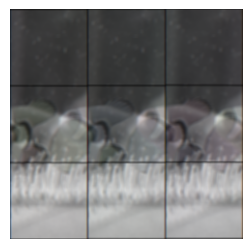

In [56]:
clownfish_out = clownfish_out.astype(int)

clownfish_out = np.reshape(clownfish_out, (1, 238, 241, 3))

plot_image_panel(clownfish_out)

**Question 2:** What do you notice (other than the blurriness) that is different about this filtered image compared to the original near the borders? Why does this happen?

**Answer 2:** 

### 2d. Gabor filter color image test

Finally, we'll test your color convolution function with the gabor filters

In [44]:
clownfish_gabor_out = conv2(clownfish_np, gabor_kers)
print(f'Your filtered clown fish shape is {clownfish_gabor_out.shape} and it should be (4, 3, 238, 241)')

img_x=238, img_y=241
n_kers=4, ker_x=21, ker_y=21
Your filtered clown fish shape is (4, 3, 238, 241) and it should be (4, 3, 238, 241)


### 2e. Visualize output of RGB Gabor filter convolution of clownfish image

In the cell below:

- Apply min-max normalization to the convolution output across the RGB color channel dimension: for every pixel of every image, normalize based on the `min`/`max` of each RGB triplet. Using `keepdims` might be useful here to do this without for loops.
- Scale the output to the range 0-255 — the max of each RGB channel should be (255, 255, 255) for (R, G, B). 
- Re-order the dimensions for visualization so that they are: `n_kers, img_y, img_x, n_chans`. The ultimate shape after your operations is `(4, 238, 241, 3)`. *This is different than just reshaping the array.*
- Convert the output to uint8.
- Visualize using the `plot_image_panel` function, defined above.

If everything goes well, you should see a similar pattern as in your grayscale filtered images, but now with watercolor/stained glass-like psychedelic colors!

### 2f. Neural net convolution

Now you're ready to implement the convolution function that we'll use in our convolutional neural network. Copy-and-paste your `conv2` code into `conv2nn` within `filter_ops.py` and make the modifications specified in the docstring.

In [ ]:
from filter_ops import conv2nn

In [ ]:
sobel_ker_1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_ker_2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_ker_3 = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]])
sobel_ker_4 = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
sobel_ops = np.stack([sobel_ker_1, sobel_ker_2, sobel_ker_3, sobel_ker_4], axis=0)

# Make a new axis for color channel and replicate the Sobel filters across that channel so that each RGB channel
# is filtered by the same filters
sobel_ops_chans = np.tile(sobel_ops[:, np.newaxis, :, :], (3, 1, 1, ))
print(f'Test Sobel filters shape (K, D, k_y, k_x): {sobel_ops_chans.shape}')

**Question 3:** Use `plot_image_panel` to visualize your Sobel filters. What do you expect each Sobel filter to do when applied to an image?

**Answer 3:** 

#### Test: Multiple images and Sobel filters

Sobel filters are simpler than Gabors. They are classic edge detection filters from computer vision and will help us debug `conv2nn`. In the following test, we simply to pass two copies of the clown fish image to `conv2nn` ($N = 2$).

In [ ]:
imgs = np.stack([clownfish_np, clownfish_np])
bias = np.zeros(len(gabor_kers))
print(f'Test img shape is {imgs.shape}')

In [ ]:
clownfish_color_imgs_out = conv2nn(imgs, sobel_ops_chans, bias)
print(f'Your filtered clown fish shape is {clownfish_color_imgs_out.shape} and it should be (2, 4, 238, 241)')
if np.all(clownfish_color_imgs_out[0] == clownfish_color_imgs_out[1]):
    print('Your filter maps are identical as expected!')
else:
    print('Your filter maps are not the same :(')

firstKerOutTest = clownfish_color_imgs_out[0, 0, 9, :10]
secondKerOutTest = clownfish_color_imgs_out[0, 0, 4, :10]
print(f'First few values in 10th row of your 1st filter output are:\n{firstKerOutTest}\nand should be:\n[-660.    0.  -16.    4.    4.    1.   -7.   -1.   -4.  -10.]')
print(f'First few values in 5th row of 2nd filter output:\n{secondKerOutTest}\nand should be:\n[-814.  -60.   12.   63.   63.   34. -126. -204.   49.  196.]')
    
plot_image_panel(clownfish_color_imgs_out[0])

#### Test: Multiple images and Sobel filters with a different bias term

In [ ]:
np.random.seed(0)
bias = 10*np.random.random(len(sobel_ops_chans))

clownfish_color_imgs_out2 = conv2nn(imgs, sobel_ops_chans, bias)

print(f'Your filtered clown fish shape is {clownfish_color_imgs_out2.shape} and it should be (2, 4, 238, 241)')
if np.all(clownfish_color_imgs_out2[0] == clownfish_color_imgs_out2[1]):
    print('Your filter maps are identical as expected!')
else:
    print('Your filter maps are not the same :(')
print(f'(bias test) The minimum value in your filtered images is {clownfish_color_imgs_out2.min():.2f} and it should be -2600.51\n')

firstKerOutTest2 = clownfish_color_imgs_out2[0, 0, 9, :5]
secondKerOutTest2 = clownfish_color_imgs_out2[0, 0, 4, :5]
print(f'First few values in 10th row of your 1st filter output are:\n{firstKerOutTest2}\nand should be:\n[-654.512    5.488  -10.512    9.488    9.488]')
print(f'First few values in 5th row of 2nd filter output:\n{secondKerOutTest2}\nand should be:\n[-808.512  -54.512   17.488   68.488   68.488]')
    
plot_image_panel(clownfish_color_imgs_out2[0])

## Task 3: 2D max pooling

We took care to preserve the spatial dimensions of the input image in our convolution operation. Convolutional networks often have a 'pyramid' shape, where the spatial dimensions reduce in size as you go deeper up the net. This is usually achieved with a pooling operation (usually max, like you will implement here, or mean), which complements the convolution. Convolution and pooling operations are often interdigitated layer-to-layer.

We will implement this function in two stages to help with the debugging.

### 3a. Implement max pooling and synthetic data tests

In `filter_ops.py` implement the `max_pool` function, then run the following test code.

In [ ]:
from filter_ops import max_pool

#### Testing: Even checkerboard

In [ ]:
# Create simple checkerboard pattern for testing.
# NOTE: We're creating an extra singleton dimension 
grid = np.tile(np.stack([np.array([1, 0]*5), np.array([0, 0]*5)]), (3, 1))
print(f'Image shape is {grid.shape}')
print(f'The checkerboard image looks like\n{grid}')

In [ ]:
grid_pooled = max_pool(grid)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (5, 9)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

Testing stride:

In [ ]:
grid_pooled = max_pool(grid, strides=2)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (3, 5)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

#### Testing: Odd checkerboard

In [ ]:
# Create simple checkerboard pattern for testing
grid_odd = np.tile(np.stack([np.array([1, 0]*2), np.array([0, 0]*2), np.array([1, 0]*2)]), (3, 1))
print(f'Image shape is {grid_odd.shape}')
print(f'The odd checkerboard image looks like\n{grid_odd}')

In [ ]:
grid_pooled = max_pool(grid_odd)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (8, 3)')
print('Here is your max filtered checkerboard. It should contain all ones:')
print(f'Here is your odd max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

Testing stride:

In [ ]:
grid_pooled = max_pool(grid_odd, strides=2)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (4, 2)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

#### Testing: bars

In [ ]:
# Create simple bar pattern for testing
bars = np.tile(np.stack([np.array([1]*10), np.array([0]*10), np.array([0]*10), np.array([0]*10)]), (3, 1))
print(f'Image shape is {bars.shape}')
print(f'Here are your bar inputs:\n{bars}')

In [ ]:
bars_pooled = max_pool(bars)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (11, 9)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Here is what it should look like:

    [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Testing stride of 2:

In [ ]:
bars_pooled = max_pool(bars, strides=2)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (6, 5)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Here is what it should look like:

    [[1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]]

Testing stride of 3:

In [ ]:
bars_pooled = max_pool(bars, strides=3)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (4, 3)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Here is what it should look like:

    [[1. 1. 1.]
     [1. 1. 1.]
     [0. 0. 0.]
     [0. 0. 0.]]

Testing pooling size of 3:

In [ ]:
bars_pooled = max_pool(bars, pool_size=3)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (10, 8)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Here is what it should look like:

    [[1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]]

### 3b. Implement and test `max_poolnn`

Add mini-batch and color channel support to your `max_pool` function. Copy-and-paste your max pooling code into `max_poolnn` to get started. Check your implementation with the following test code.

In [ ]:
from filter_ops import max_poolnn

#### Test: Simple bars

Testing pooling size of 2 and stride 2

In [ ]:
# Create simple bar pattern for testing
bars_batch = np.tile(np.stack([np.array([1]*10), np.array([0]*10), np.array([0]*10), np.array([0]*10)]), (1, 1, 3, 1))
print(f'Image shape is {bars_batch.shape}')
print(f'Here are your bar inputs:\n{bars_batch[0,0]}')

In [ ]:
bars_batch_pooled = max_poolnn(bars_batch, strides=2, pool_size=2)
print(f'Pooled image shape is {bars_batch_pooled.shape} and it should be (1, 1, 6, 5)')
print(f'Here are your max filtered bars:\n{bars_batch_pooled[0,0]}')

Here is what it should look like:

    [[1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]]

#### Test on real image

In the cell below, take your color clownfish image in numpy array format and add a leading singleton for the batch dimension. The following test code assumes the variable is called `clownfish_np_batch`.

In [ ]:
# Load in the clownfish image then convert to grayscale for testing
clownfish1 = Image.open('images/clownfish.png', 'r')
clownfish_np_batch = np.array(clownfish1)
plt.imshow(clownfish_np_batch)
plt.grid()
plt.show()
clownfish_np_batch = clownfish_np_batch[:,:, :3]  # strip out alpha channel so its just RGB
clownfish_np_batch = np.transpose(clownfish_np_batch, (2, 0, 1))  # permute dims so that channel is leading
clownfish_np_batch = clownfish_np_batch[np.newaxis, :, :, :]  # add dummy batch dimension
print(f'Shape of clownfish image is {clownfish_np_batch.shape}')

clownfish1.close()

In [ ]:
clownfish_mp = max_poolnn(clownfish_np_batch, pool_size=8)
print(f'Pooled image shape is {clownfish_mp.shape} and it should be (1, 3, 231, 234)')
print(f'\nFirst few values in 10th row of your Red output channel are:\n{clownfish_mp[0,0,9,:10]}\nand should be:\n[105. 105. 105. 105. 105. 105.  80.  28.  22.  22.]')
print(f'\nFirst few values in 10th row of your Green output channel are:\n{clownfish_mp[0,1,9,:10]}\nand should be:\n[170. 170. 170. 170. 170. 170. 118.  58.  54.  54.]')

### 3c. Visualize output of max pooling of clownfish image

In the cell below:

- Re-order the dimensions of `img_pooled` so that it is `batch, img_y, img_x, n_chans` = (1, 231, 234, 3).
- Convert the output to uint8.
- Visualize using the `plot_image_panel` function, defined above.

If everything goes well, it should look like a blocky version of the original image (with color).